# HW0916_03

##### (a)Find the mean and standard deviation of returns of these five stocks. 

In [1]:
import pandas as pd
stock = pd.read_csv("Stocks_ClosePrice.csv")
mean_returns = stock[["FB.1", "GOOG.1","NFLX.1","AMZN.1","AAPL.1"]].mean()
mean_returns

FB.1      0.000555
GOOG.1    0.000189
NFLX.1   -0.001250
AMZN.1   -0.000302
AAPL.1   -0.000056
dtype: float64

In [2]:
std_returns = stock[["FB.1", "GOOG.1","NFLX.1","AMZN.1","AAPL.1"]].std()
std_returns

FB.1      0.020943
GOOG.1    0.018474
NFLX.1    0.027119
AMZN.1    0.022313
AAPL.1    0.020421
dtype: float64

##### (b)Plot the mean and risk (standard deviation) for these five returns using red starts in the 2-dimensional plane. 

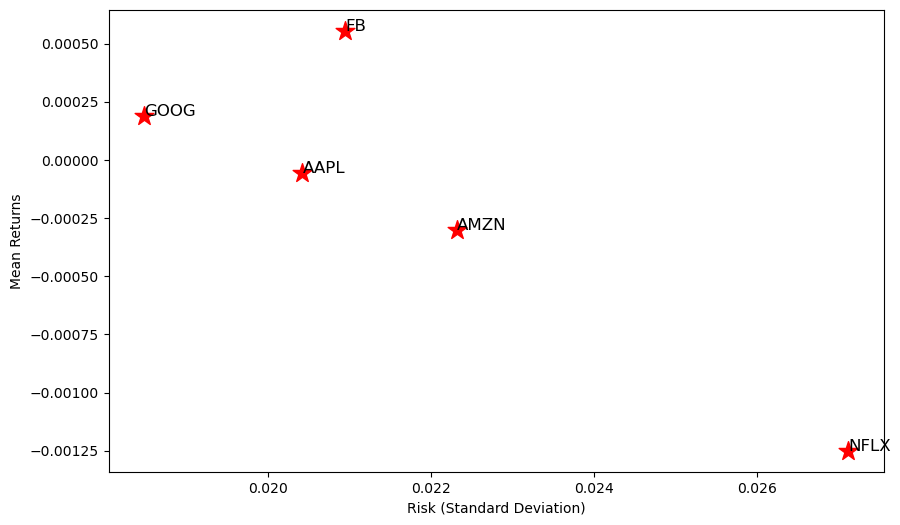

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(std_returns, mean_returns, color='red', marker='*', s=200)

for i, txt in enumerate(mean_returns.index):
    plt.text(std_returns.iloc[i], mean_returns.iloc[i], txt.replace('.1', ''), fontsize=12)

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Returns')
plt.show()

##### (c)Randomly selected weights so that each weight is nonnegative and sums up to one. Print the random weight, the mean and standard deviation of the portfolio. 

In [4]:
import numpy as np
np.random.seed(25)
weights = np.random.rand(len(mean_returns))
weights /= np.sum(weights)
portfolio_mean = np.dot(weights, mean_returns)
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(stock[["FB.1", "GOOG.1", "NFLX.1", "AMZN.1", "AAPL.1"]].cov(), weights)))
print("Random Weights:", weights)
print("Portfolio Mean:", portfolio_mean)
print("Portfolio Standard Deviation:", portfolio_std)

Random Weights: [0.37372431 0.25009195 0.11976325 0.07985015 0.17657034]
Portfolio Mean: 7.102079403014659e-05
Portfolio Standard Deviation: 0.01781893980536889


##### (d)Repeat (c) for 1000 times, and plot the mean and standard deviation for these artificial portfolios using blue points in the 2-dimensional plane in (b). 

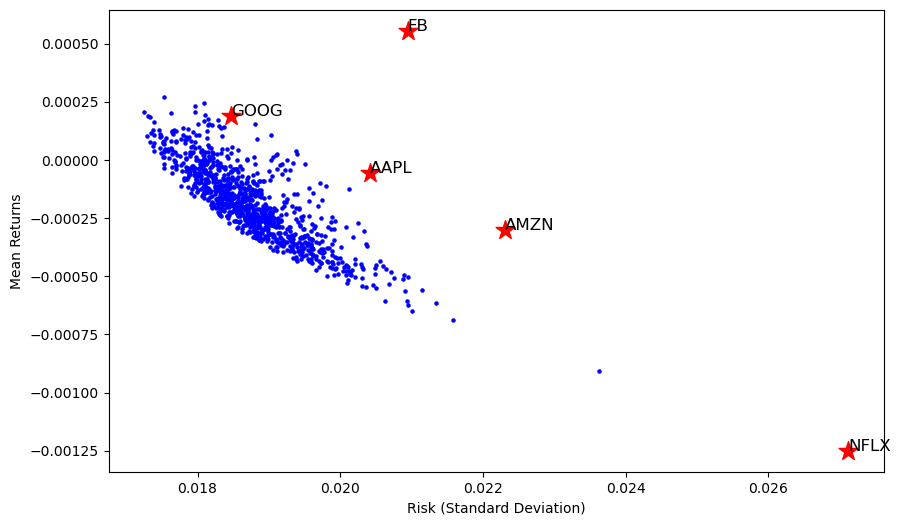

In [5]:
portfolio_means = []
portfolio_stds = []
for _ in range(1000):
    weights = np.random.rand(len(mean_returns))
    weights /= weights.sum()
    
    portfolio_mean = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(stock[["FB.1", "GOOG.1", "NFLX.1", "AMZN.1", "AAPL.1"]].cov(), weights)))
    
    portfolio_means.append(portfolio_mean)
    portfolio_stds.append(portfolio_std)

plt.figure(figsize=(10, 6))

plt.scatter(std_returns, mean_returns, color='red', marker='*', s=200)
for i, txt in enumerate(mean_returns.index):
    plt.text(std_returns.iloc[i], mean_returns.iloc[i], txt.replace('.1', ''), fontsize=12)

plt.scatter(portfolio_stds, portfolio_means, color='blue', s=5)
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Returns')
plt.show()

##### (e) Draw the efficiency frontier in the figure of (b), assuming that no short sales are allowed. 

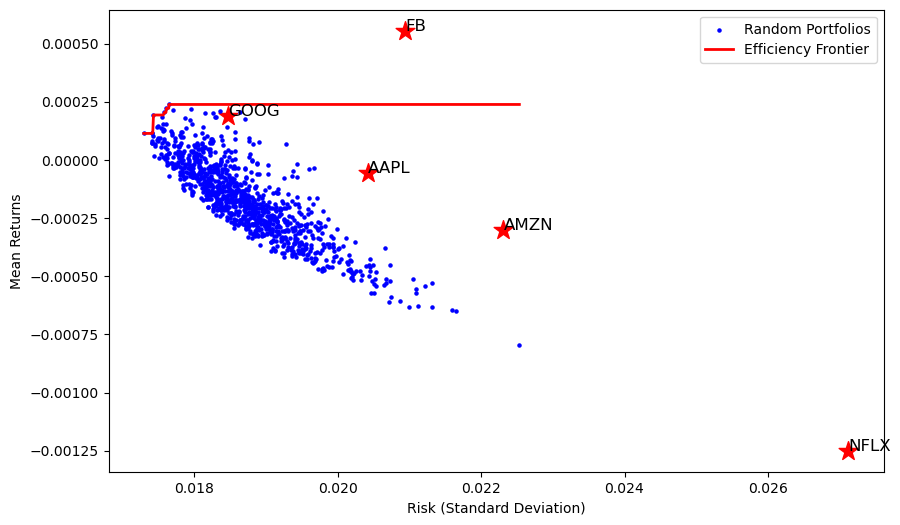

In [6]:
portfolio_means = []
portfolio_stds = []

for _ in range(1000):
    weights = np.random.rand(len(mean_returns))
    weights /= np.sum(weights)

    portfolio_mean = np.dot(weights, mean_returns)

    cov_matrix = stock[["FB.1", "GOOG.1", "NFLX.1", "AMZN.1", "AAPL.1"]].cov().values
    portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std = np.sqrt(portfolio_var)

    portfolio_means.append(portfolio_mean)
    portfolio_stds.append(portfolio_std)

efficient_frontier_means = []
efficient_frontier_stds = []

sorted_stds = np.sort(np.unique(portfolio_stds))
for std in sorted_stds:
    max_mean = max(mean for mean, std_dev in zip(portfolio_means, portfolio_stds) if std_dev <= std)
    efficient_frontier_means.append(max_mean)
    efficient_frontier_stds.append(std)

plt.figure(figsize=(10, 6))

plt.scatter(std_returns, mean_returns, color='red', marker='*', s=200)
for i, txt in enumerate(mean_returns.index):
    plt.text(std_returns.iloc[i], mean_returns.iloc[i], txt.replace('.1', ''), fontsize=12)

plt.scatter(portfolio_stds, portfolio_means, color='blue', s=5, label='Random Portfolios')
plt.plot(efficient_frontier_stds, efficient_frontier_means, color='red', label='Efficiency Frontier', linewidth=2)

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Returns')
plt.legend()
plt.show()

##### (f) Check if the efficiency frontier in (e) is the envelope line of the blue points in (d). 

Yes. For all portfolios with the same return, the risk is higher than the efficient frontier; for all portfolios with the same risk, the return is lower than the efficient frontier.